In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np
import cv2

from keypoint_matching import KeypointMatcher
from RANSAC import ImageAlignment
from utils import show_two_images, show_single_image

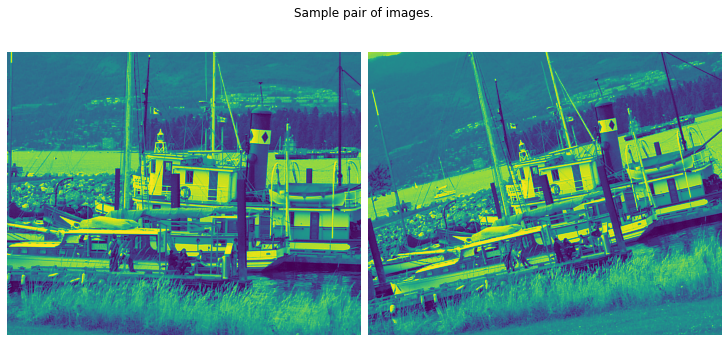

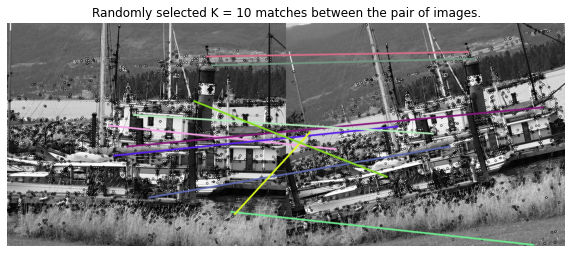

Found 15 inliers!
Found 18 inliers!
Found 243 inliers!
Found 355 inliers!
Found 904 inliers!
Found 1333 inliers!


In [3]:
boat1 = cv2.imread('boat1.pgm', cv2.IMREAD_GRAYSCALE)
boat2 = cv2.imread('boat2.pgm', cv2.IMREAD_GRAYSCALE)
show_two_images(boat1, boat2, title="Sample pair of images.")

# get matches
kp_matcher = KeypointMatcher(contrastThreshold=0.1, edgeThreshold=5)
matches, kp1, des1, kp2, des2 = kp_matcher.match(boat1, boat2, show_matches=True)

image_alignment = ImageAlignment()
params = image_alignment.align(boat1, kp1, boat2, kp2, matches)

In [4]:
params

array([  0.85486443,   0.2181152 ,  -0.21386042,   0.85678715,
         9.51344331, 131.95357429])

In [21]:
# Apply the affine transformation using cv2.warpAffine()
rows, cols = boat1.shape[:2]

M = np.zeros((2, 3))
M[0, :2] = params[:2]
M[1, :2] = params[2:4]
M[0, 2] = params[4]
M[1, 2] = params[5]

boat1_warped = cv2.warpAffine(boat1, M, (cols,rows))

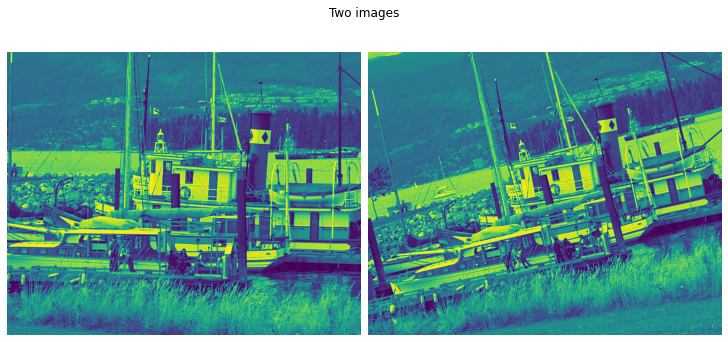

In [24]:
show_two_images(boat1, boat2)

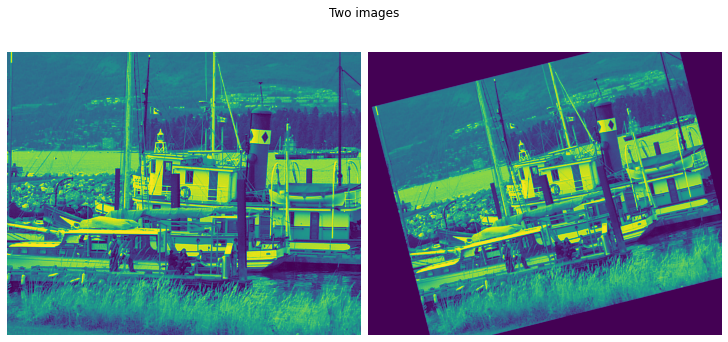

In [23]:
show_two_images(boat1, boat1_warped)